In [ ]:
# ADD MODULES HERE AS NEEDED #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FILL IN YOUR FILEPATH #
filepath = "/content/drive/MyDrive/Fall 2024/Data Mining/Projects/Student Database.csv"

df = pd.read_csv(filepath)
df.head(5)

,Unnamed: 0,Name,Student ID,Date of Birth,Major,Minor,Advisor,Overall GPA,Major-Specific GPA,Academic Standing,Club Participation
0,0,"Hunter, Teresa",G21H01200105,"20 Mar, 2001",Pre-Dental,NaN,Pamela Matthews,3.06,2.91,Good Standing,[]
1,1,"Taylor, Alan",G25T00200400,"9 Feb, 2004",Accounting,Computer Science,Jean Gomez,3.19,2.73,Good Standing,"['Black Student Alliance', 'Investment Club', ..."
2,2,"Ramos, Susan",G60R06200218,"16 Jun, 2002",Kinesiology,Social Work,Frances Walker,2.44,2.01,Academic Probation,['Muslim Student Association']
3,3,"Kelly, Samantha",G23K05200415,"7 Mar, 2004",Social Work,NaN,Paul Gordon,3.56,3.31,Good Standing,[]
4,4,"Thompson, Christine",G58T05200716,"30 Oct, 2007",Digital Media,NaN,Paul Gordon,2.92,2.55,Good Standing,[]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Student ID          50000 non-null  object 
 3   Date of Birth       50000 non-null  object 
 4   Major               50000 non-null  object 
 5   Minor               14920 non-null  object 
 6   Advisor             50000 non-null  object 
 7   Overall GPA         49990 non-null  float64
 8   Major-Specific GPA  50000 non-null  float64
 9   Academic Standing   50000 non-null  object 
 10  Club Participation  50000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [ ]:
#drop all the duplicates
df_drop = df.drop_duplicates()
#showed whether or not there were duplicates
print(f"Original length: {len(df)}")
print(f"New length: {len(df_drop)}")
print(f"{len(df) - len(df_drop)} rows removed")

Original length: 50000
New length: 50000
0 rows removed


In [ ]:
#drop Unnamed: 0 column
df = df.drop(columns = 'Unnamed: 0')
df

,Name,Student ID,Date of Birth,Major,Minor,Advisor,Overall GPA,Major-Specific GPA,Academic Standing,Club Participation
0,"Hunter, Teresa",G21H01200105,"20 Mar, 2001",Pre-Dental,NaN,Pamela Matthews,3.06,2.91,Good Standing,[]
1,"Taylor, Alan",G25T00200400,"9 Feb, 2004",Accounting,Computer Science,Jean Gomez,3.19,2.73,Good Standing,"['Black Student Alliance', 'Investment Club', ..."
2,"Ramos, Susan",G60R06200218,"16 Jun, 2002",Kinesiology,Social Work,Frances Walker,2.44,2.01,Academic Probation,['Muslim Student Association']
3,"Kelly, Samantha",G23K05200415,"7 Mar, 2004",Social Work,NaN,Paul Gordon,3.56,3.31,Good Standing,[]
4,"Thompson, Christine",G58T05200716,"30 Oct, 2007",Digital Media,NaN,Paul Gordon,2.92,2.55,Good Standing,[]
...,...,...,...,...,...,...,...,...,...,...
49995,"Jenkins, Katherine",G27J05200415,"30 Nov, 2004",Social Work,Nursing,Paul Gordon,2.98,2.83,Good Standing,['Board Game Club']
49996,"Perkins, Nicole",G32P03200211,"28 Feb, 2002",Global Studies,NaN,Willie Jordan,2.70,2.78,Good Standing,"['First Generation Scholars', 'Muslim Student ..."
49997,"Gray, Joshua",G45G00200000,"25 Jan, 2000",Accounting,NaN,Jean Gomez,2.81,2.71,Good Standing,[]
49998,"Edwards, Lori",G39E01200604,"8 Jul, 2006",Finance,NaN,Pamela Matthews,2.89,2.72,Good Standing,['Math Club']


In [ ]:
#check for missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                50000 non-null  object 
 1   Student ID          50000 non-null  object 
 2   Date of Birth       50000 non-null  object 
 3   Major               50000 non-null  object 
 4   Minor               14920 non-null  object 
 5   Advisor             50000 non-null  object 
 6   Overall GPA         49990 non-null  float64
 7   Major-Specific GPA  50000 non-null  float64
 8   Academic Standing   50000 non-null  object 
 9   Club Participation  50000 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.8+ MB
None


noticed all the columns had 50000 values excpet Minor and Overall GPA

*   List item
*   List item



Date of Birth is of object datatype

In [ ]:
#change Date of Birth to Datetime datatype
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'],errors='coerce')
print(df.dtypes)

Name                          object
Student ID                    object
Date of Birth         datetime64[ns]
Major                         object
Minor                         object
Advisor                       object
Overall GPA                  float64
Major-Specific GPA           float64
Academic Standing             object
Club Participation            object
dtype: object


In [ ]:
age = 2024 - df['Date of Birth'].dt.year
print(age.describe())
oldest_person = df[df['Date of Birth']== df['Date of Birth'].min()]
print(oldest_person)


count    50000.000000
mean        20.546140
std          2.490613
min         13.000000
25%         19.000000
50%         21.000000
75%         22.000000
max        124.000000
Name: Date of Birth, dtype: float64
                    Name    Student ID Date of Birth             Major  \
584       Ramirez, Mason  G91R02200407    1900-01-01            French   
6001   Barnes, Elizabeth  G46B00200300    1900-01-01        Accounting   
9016         Kelly, Judy  G78K00200501    1900-01-01       Mathematics   
9354       Hill, Charles  G12H03200409    1900-01-01  Computer Science   
11053    Tucker, Theresa  G98T03200309    1900-01-01  Computer Science   
28120     Bennett, Kevin  G33B00200601    1900-01-01       Mathematics   
33008      Andrews, Alan  G98A05200617    1900-01-01      Theater Arts   
33961       Young, David  G22Y05200317    1900-01-01      Theater Arts   
37972    Warren, Dorothy  G24W00200300    1900-01-01        Accounting   
40434   Tucker, Isabella  G54T05200316    1900-0

noticed there was a max value of 124, so I checked the number of people with the max value and found that their date of birth is in 1900, I decided to move foward and drop these students since this data is old and will nto aid in any research to be done with the data

In [ ]:
past_students = df[df['Date of Birth'].dt.year == 1900].index
df = df.drop(past_students).reset_index(drop=True)
df.describe()

,Date of Birth,Overall GPA,Major-Specific GPA
count,49990,49980.000000,49990.000000
mean,2003-12-22 00:49:32.754550912,2.994057,2.769717
min,1994-06-10 00:00:00,1.310000,0.930000
25%,2002-08-04 00:00:00,2.710000,2.470000
50%,2003-12-22 00:00:00,3.000000,2.770000
75%,2005-05-09 00:00:00,3.280000,3.060000
max,2011-11-11 00:00:00,4.000000,32.000000
std,NaN,0.413053,0.552191




```
# This is formatted as code
```

OVERALL GPA has a lower count than date of birth and major specific GPA and major specific GPA has a max GPA of 32.

In [ ]:
#checks the number of individuala with a GPA higher than 4.0
high_GPA = df[df['Major-Specific GPA'] > 4]
print(high_GPA.size)
print(high_GPA)

100
                   Name    Student ID Date of Birth             Major  \
2494      Barnes, Maria  G21B02200407    2004-10-16            French   
3359       Walker, Lisa  G83W05200415    2004-09-30       Social Work   
12535      Brooks, Carl  G24B00200402    2004-12-31            Acting   
13142  Kennedy, Stephen  G43K01200604    2006-01-24           Finance   
19581     Willis, Billy  G46W04200713    2007-05-31           History   
26281      Young, Bobby  G79Y04200513    2005-10-25           History   
29749    Scott, Timothy  G33S06200318    2003-12-03       Kinesiology   
32462     Hicks, Nicole  G55H02200407    2004-12-30            French   
46299  Mitchell, Sandra  G86M02200408    2004-04-02  Criminal Justice   
46880      Harris, Liam  G98H02200006    2000-05-13         Chemistry   

                  Minor          Advisor  Overall GPA  Major-Specific GPA  \
2494                NaN     Frank Weaver         2.08                17.1   
3359                NaN      Paul Gord

I noticed there are 10 students with an odd GPA, over a 4.0 and they have an academic standing of **ERROR** and they are all born before 2008, since their values are unusal I will drop these students

In [ ]:
df.drop(high_GPA.index, inplace=True)

our dataset has dropped from 50000 to 49980 however, that is only, 20 individuals

> `Add blockquote`



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               14916 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49970 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 4.2+ MB


In [ ]:
print(df)

                      Name    Student ID Date of Birth            Major  \
0           Hunter, Teresa  G21H01200105    2001-03-20       Pre-Dental   
1             Taylor, Alan  G25T00200400    2004-02-09       Accounting   
2             Ramos, Susan  G60R06200218    2002-06-16      Kinesiology   
3          Kelly, Samantha  G23K05200415    2004-03-07      Social Work   
4      Thompson, Christine  G58T05200716    2007-10-30    Digital Media   
...                    ...           ...           ...              ...   
49985   Jenkins, Katherine  G27J05200415    2004-11-30      Social Work   
49986      Perkins, Nicole  G32P03200211    2002-02-28   Global Studies   
49987         Gray, Joshua  G45G00200000    2000-01-25       Accounting   
49988        Edwards, Lori  G39E01200604    2006-07-08          Finance   
49989        Edwards, Eric  G31E06200120    2001-02-28  Video Game Dev.   

                  Minor          Advisor  Overall GPA  Major-Specific GPA  \
0                   Na

In [ ]:
#check if any of the majors are misspelt
print(df['Major'].value_counts(),"\n")
#check if any of the minors are misspelt
print(df['Minor'].value_counts())

Major
Marketing           2460
History             2459
Psychology          2421
Global Studies      2407
Finance             2404
Computer Science    2404
French              2400
Digital Media       2396
Nursing             2390
Acting              2386
Mathematics         2385
Criminal Justice    2376
Kinesiology         2375
Chemistry           2375
Accounting          2371
Social Work         2367
Video Game Dev.     2354
Theater Arts        2322
Spanish             2320
Pre-Dental          2311
Pre-Medical         2297
Name: count, dtype: int64 

Minor
Mathematics         750
Marketing           742
Computer Science    736
Video Game Dev.     736
Theater Arts        728
Acting              722
Psychology          722
Digital Media       718
Pre-Dental          714
Social Work         709
Finance             709
Global Studies      708
Accounting          708
Nursing             698
History             698
Criminal Justice    697
French              691
Kinesiology         690
Spa

In [ ]:
#print the min,max,... to check from outliers
print(df['Overall GPA'].describe())

count    49970.000000
mean         2.994087
std          0.413048
min          1.310000
25%          2.710000
50%          3.000000
75%          3.280000
max          4.000000
Name: Overall GPA, dtype: float64


In [ ]:
print(df['Major-Specific GPA'].describe())

count    49980.000000
mean         2.765001
std          0.434458
min          0.930000
25%          2.470000
50%          2.770000
75%          3.060000
max          4.000000
Name: Major-Specific GPA, dtype: float64


In [ ]:
print(df['Academic Standing'].value_counts())


Academic Standing
Good Standing         33375
Academic Warning       7285
Academic Probation     5424
Financial Hold         3896
Name: count, dtype: int64


In [ ]:
#check the contents of the error rows
print(df[df['Academic Standing'] == '**ERROR**'])

Empty DataFrame
Columns: [Name, Student ID, Date of Birth, Major, Minor, Advisor, Overall GPA, Major-Specific GPA, Academic Standing, Club Participation]
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               14916 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49970 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 4.2+ MB


In [ ]:
#minor is the only value of Nan so replaced it with a placeholder of No
df['Minor'] = df['Minor'].fillna('No')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               49980 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49970 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 4.2+ MB


In [ ]:
df.head()

,Name,Student ID,Date of Birth,Major,Minor,Advisor,Overall GPA,Major-Specific GPA,Academic Standing,Club Participation
0,"Hunter, Teresa",G21H01200105,2001-03-20,Pre-Dental,No,Pamela Matthews,3.06,2.91,Good Standing,[]
1,"Taylor, Alan",G25T00200400,2004-02-09,Accounting,Computer Science,Jean Gomez,3.19,2.73,Good Standing,"['Black Student Alliance', 'Investment Club', ..."
2,"Ramos, Susan",G60R06200218,2002-06-16,Kinesiology,Social Work,Frances Walker,2.44,2.01,Academic Probation,['Muslim Student Association']
3,"Kelly, Samantha",G23K05200415,2004-03-07,Social Work,No,Paul Gordon,3.56,3.31,Good Standing,[]
4,"Thompson, Christine",G58T05200716,2007-10-30,Digital Media,No,Paul Gordon,2.92,2.55,Good Standing,[]


since the Overall GPA and Major-Specific GPA are similar I decided to not drop the NaN Overall GPA, and simply make them the same

In [ ]:
df['Overall GPA'] = df['Overall GPA'].fillna(df['Major-Specific GPA'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               49980 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49980 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 4.2+ MB


**4.1. Is one major substantially outperforming the others?**

In [ ]:
df.head()

,Name,Student ID,Date of Birth,Major,Minor,Advisor,Overall GPA,Major-Specific GPA,Academic Standing,Club Participation
0,"Hunter, Teresa",G21H01200105,2001-03-20,Pre-Dental,No,Pamela Matthews,3.06,2.91,Good Standing,[]
1,"Taylor, Alan",G25T00200400,2004-02-09,Accounting,Computer Science,Jean Gomez,3.19,2.73,Good Standing,"['Black Student Alliance', 'Investment Club', ..."
2,"Ramos, Susan",G60R06200218,2002-06-16,Kinesiology,Social Work,Frances Walker,2.44,2.01,Academic Probation,['Muslim Student Association']
3,"Kelly, Samantha",G23K05200415,2004-03-07,Social Work,No,Paul Gordon,3.56,3.31,Good Standing,[]
4,"Thompson, Christine",G58T05200716,2007-10-30,Digital Media,No,Paul Gordon,2.92,2.55,Good Standing,[]


there is only one way to truly check the major that is substantially outperfomring the others and that is to find the mean Overall GPA of the students in each major. However, I've decided to also explore the average of the mean specific GPA

In [ ]:
#check major specific GPA
average_Majorspecific_GPA = df.groupby('Major')['Major-Specific GPA'].mean().sort_values(ascending=False)
print(average_Majorspecific_GPA)

Major
Digital Media       2.781790
Chemistry           2.776728
Computer Science    2.770603
Acting              2.770419
History             2.770411
Theater Arts        2.769242
Mathematics         2.767660
Accounting          2.766200
Nursing             2.766105
French              2.765779
Social Work         2.764423
Spanish             2.763427
Marketing           2.763248
Psychology          2.762689
Global Studies      2.761708
Pre-Medical         2.761171
Pre-Dental          2.759996
Criminal Justice    2.758186
Kinesiology         2.756497
Finance             2.755711
Video Game Dev.     2.752519
Name: Major-Specific GPA, dtype: float64


In [ ]:
#Check overall GPA average
average_overallGPA = df.groupby('Major')['Overall GPA'].mean().sort_values(ascending=False)
print(average_overallGPA)


Major
Digital Media       3.007454
Computer Science    3.002113
Acting              2.999929
Theater Arts        2.999574
Chemistry           2.999461
French              2.998058
History             2.996141
Mathematics         2.995153
Spanish             2.994246
Pre-Medical         2.993831
Psychology          2.992639
Global Studies      2.992368
Social Work         2.991939
Pre-Dental          2.991692
Accounting          2.990924
Finance             2.989784
Nursing             2.989745
Video Game Dev.     2.988275
Marketing           2.987846
Kinesiology         2.987537
Criminal Justice    2.986002
Name: Overall GPA, dtype: float64


Now I believe a bar chart would be ideal to visually understand both results

Text(0.5, 1.0, 'Relationship between Major and overall GPA')

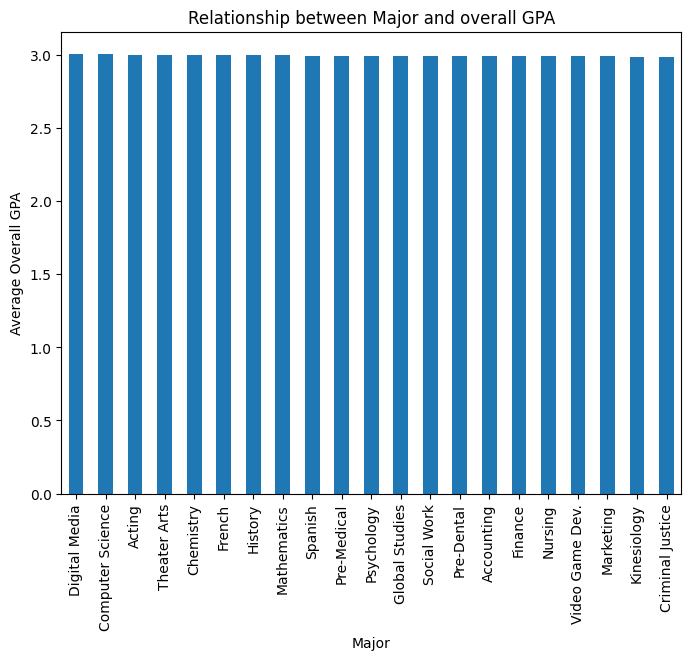

In [ ]:
average_overallGPA.plot(kind='bar', figsize=(8,6))
plt.xlabel('Major')
plt.ylabel('Average Overall GPA')
plt.title('Relationship between Major and overall GPA')

The graph above gives a good representation of the average overall GPAs since the data has been cleaned of all outliers hence making the average more accurate.

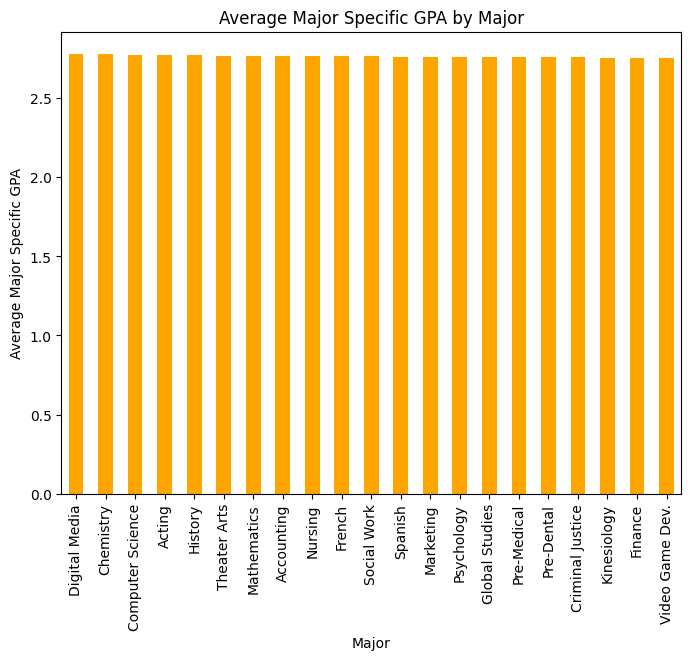

In [ ]:
# Plotting the performance of each major
average_Majorspecific_GPA.plot(kind='bar', color = 'orange', figsize=(8,6))
plt.title('Average Major Specific GPA by Major')
plt.xlabel('Major')
plt.ylabel('Average Major Specific GPA')
plt.show()

In the first graph you can see that I am comparing the mean Overall GPAs of each major and we saw that students studying Digital Media had the highest average GPA of 2.781790 with chemistry following close behind with an average of 2.776728. In the second graph, I also plotted a bar graph but this time comparing the Average Major Specific GPA of each major and found that students studying Digital Media had the highest average Major specific GPA of 3.007454 with Computer Science having the second highest average of 3.002113.
We can clearly see that Digital Media student’s had the highest average in both graphs, however we also noticed that the GPA differences between each major is visually unrecognizable. This means while Digital Media students may be performing the best in terms of GPA, they are not substantially outperforming the other majors since there is only a small margin separating the top-performing majors.


**How does declaring a minor affect a student’s performance in their major?**

to approach this I will simply comapre the average GPAs for students with a minor and with a minor after separating them into two categories, this can be done since I labelled students without a minor with the term 'No'.

dict_values([2.9292571735049613, 3.0215905201916495])


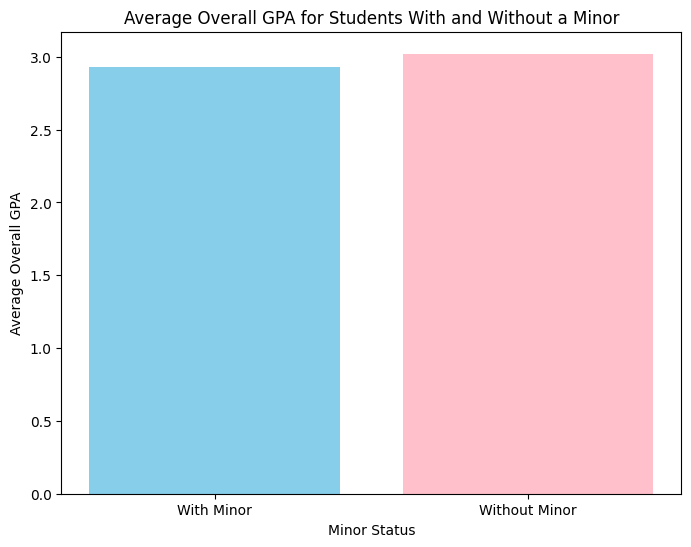

dict_values([2.6304357736658623, 2.8222438968742876])


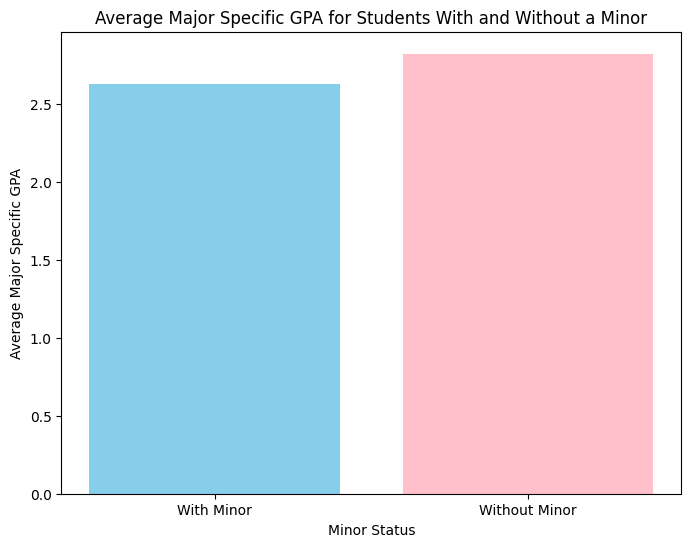

In [ ]:
no_minor = df[df['Minor'] == 'No']
with_minor = df[df['Minor'] != 'No']

average_overallGPA_no_minor = no_minor['Overall GPA'].mean()
average_overallGPA_with_minor = with_minor['Overall GPA'].mean()
#grouped the data to make a bar chart
gpa_data = {'With Minor': average_overallGPA_with_minor, 'Without Minor': average_overallGPA_no_minor}

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(gpa_data.keys(), gpa_data.values(), color=['skyblue', 'pink'])
print(gpa_data.values())
# Add titles and labels
plt.title('Average Overall GPA for Students With and Without a Minor')
plt.xlabel('Minor Status')
plt.ylabel('Average Overall GPA')

# Show the plot
plt.show()



average_majorGPA_no_minor = no_minor['Major-Specific GPA'].mean()
average_majorGPA_with_minor = with_minor['Major-Specific GPA'].mean()
gpa_data = {'With Minor': average_majorGPA_with_minor, 'Without Minor': average_majorGPA_no_minor}

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(gpa_data.keys(), gpa_data.values(), color=['skyblue', 'pink'])
print(gpa_data.values())
# Add titles and labels
plt.title('Average Major Specific GPA for Students With and Without a Minor')
plt.xlabel('Minor Status')
plt.ylabel('Average Major Specific GPA')

# Show the plot
plt.show()

**How does age affect a student’s performance?**

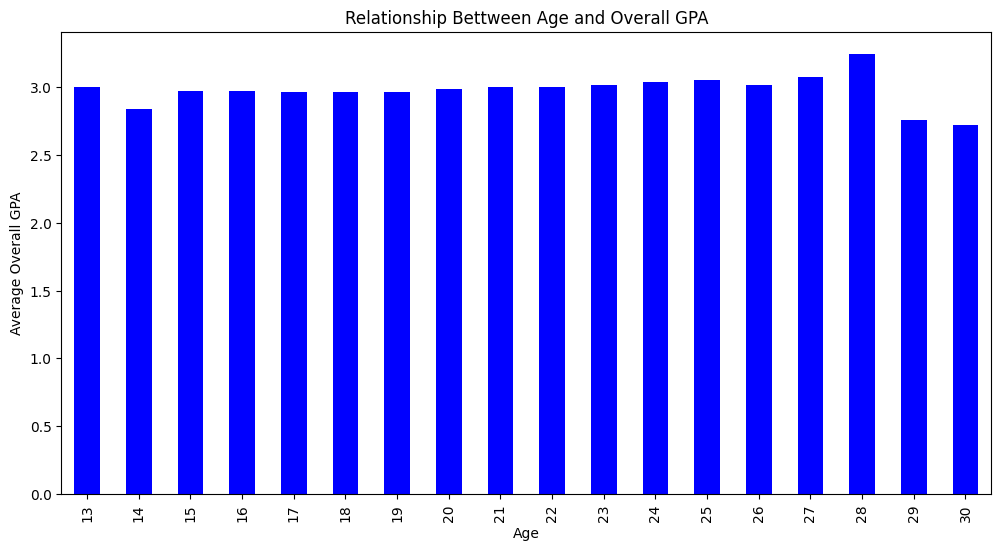

3.2463636363636366


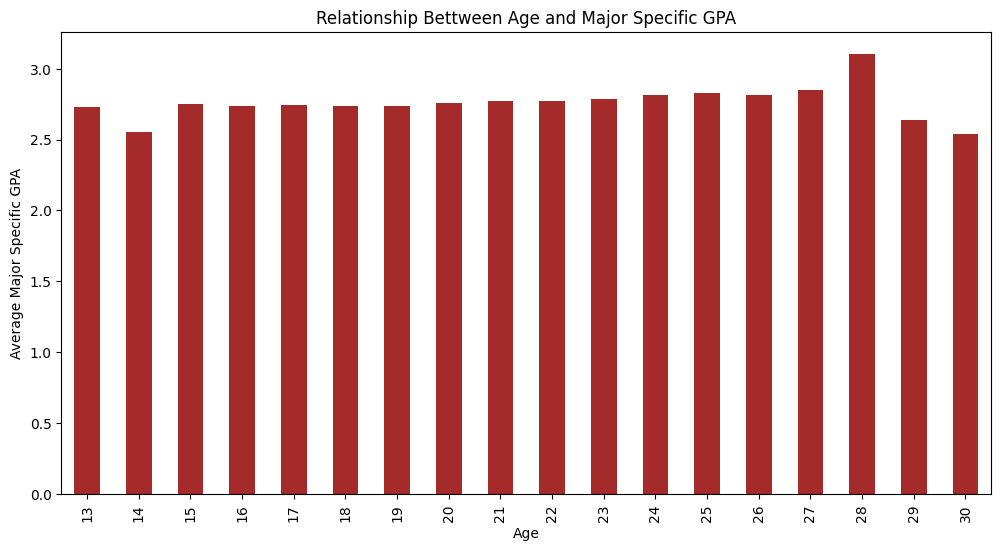

3.1036363636363635


In [ ]:
df['Age'] = 2024 - df['Date of Birth'].dt.year

# Group by Age and calculate average Overall GPA
age_overall_gpa = df.groupby('Age')['Overall GPA'].mean()

# Display the top performing advisors

# Plot a bar chart of the top performing advisors
plt.figure(figsize=(12, 6))
age_overall_gpa.plot(kind='bar', color='blue')

plt.title('Relationship Bettween Age and Overall GPA')
plt.xlabel('Age')
plt.ylabel('Average Overall GPA')
plt.show()
print((age_overall_gpa).max())


age_major_specific_GPA = df.groupby('Age')['Major-Specific GPA'].mean()
plt.figure(figsize=(12, 6))
age_major_specific_GPA.plot(kind='bar', color='brown')

plt.title('Relationship Bettween Age and Major Specific GPA')
plt.xlabel('Age')
plt.ylabel('Average Major Specific GPA')
plt.show()
print((age_major_specific_GPA).max())


Advisor
WILLIE JORDAN      3.520000
PAMELA ANDERSON    3.365000
Paul Gordon        2.999733
Willie Jordan      2.996063
Jean Gomez         2.995352
Frank Weaver       2.994534
Pamela Anderson    2.994147
Pamela Matthews    2.990391
Frances Walker     2.987899
JEAN GOMEZ         2.940000
Name: Overall GPA, dtype: float64


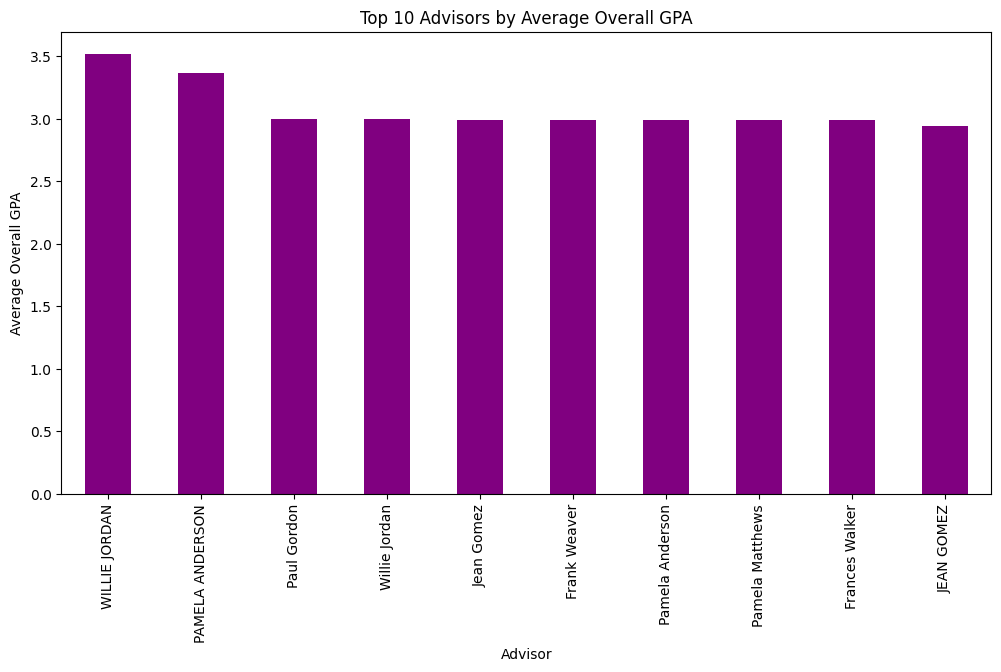

Advisor
WILLIE JORDAN      3.250000
PAMELA ANDERSON    3.150000
FRANCES WALKER     2.845000
Paul Gordon        2.771937
Jean Gomez         2.768133
Frank Weaver       2.766926
Pamela Anderson    2.765350
Willie Jordan      2.764474
Pamela Matthews    2.760601
Frances Walker     2.757480
Name: Major-Specific GPA, dtype: float64


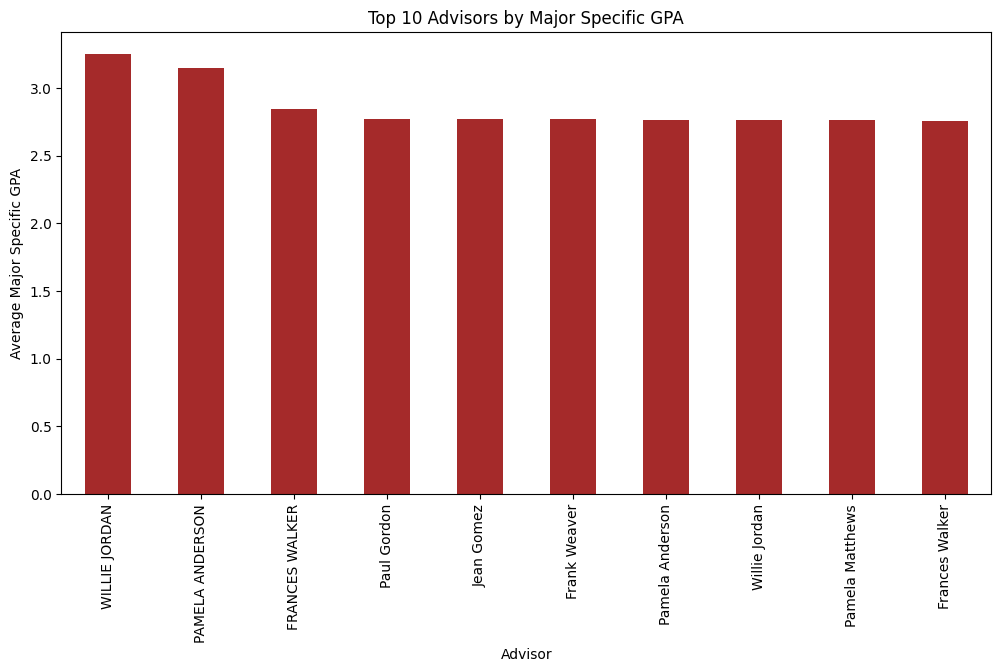

In [ ]:
advisor_gpa = df.groupby('Advisor')['Overall GPA'].mean()

advisor_gpa_sorted = advisor_gpa.sort_values(ascending=False)

# Display the top performing advisors
print(advisor_gpa_sorted.head(10))

# Plot a bar chart of the top performing advisors
plt.figure(figsize=(12, 6))
advisor_gpa_sorted.head(10).plot(kind='bar', color='purple')

plt.title('Top 10 Advisors by Average Overall GPA')
plt.xlabel('Advisor')
plt.ylabel('Average Overall GPA')
plt.show()


advisor_Majorgpa = df.groupby('Advisor')['Major-Specific GPA'].mean()

advisor_Majorgpa_sorted = advisor_Majorgpa.sort_values(ascending=False)

# Display the top performing advisors
print(advisor_Majorgpa_sorted.head(10))

# Plot a bar chart of the top performing advisors
plt.figure(figsize=(12, 6))
advisor_Majorgpa_sorted.head(10).plot(kind='bar', color='brown')

plt.title('Top 10 Advisors by Major Specific GPA')
plt.xlabel('Advisor')
plt.ylabel('Average Major Specific GPA')
plt.show()

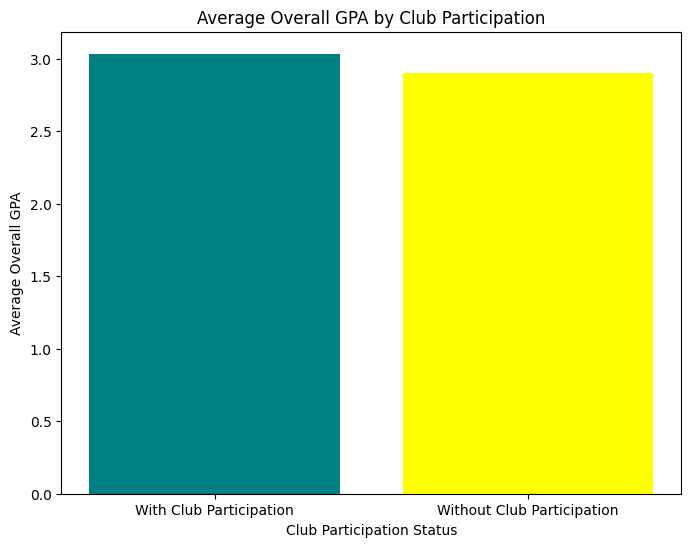

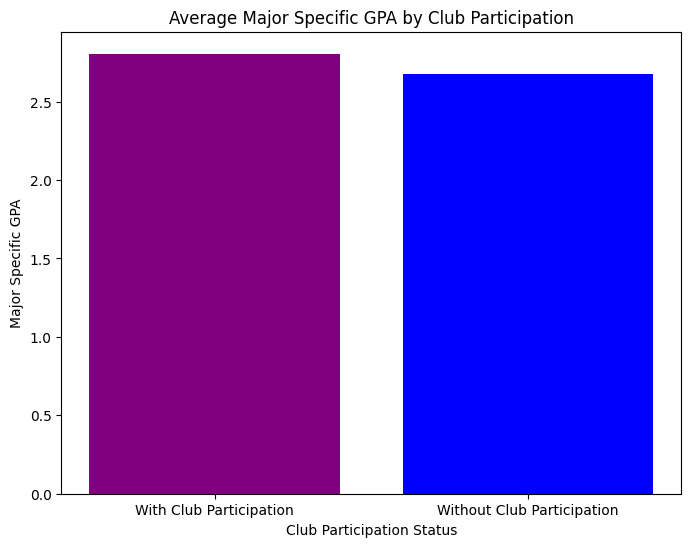

In [ ]:
# Group students based on club participation
with_club = df[df['Club Participation'] != '[]']
without_club = df[df['Club Participation'] == '[]']

# Calculate the average GPA for students with and without club participation
mean_gpa_with_club = with_club['Overall GPA'].mean()
mean_gpa_without_club = without_club['Overall GPA'].mean()

# Data for the bar chart
club_data = {'With Club Participation': mean_gpa_with_club, 'Without Club Participation': mean_gpa_without_club}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(club_data.keys(), club_data.values(), color=['teal', 'yellow'])

plt.title('Average Overall GPA by Club Participation')
plt.xlabel('Club Participation Status')
plt.ylabel('Average Overall GPA')

plt.show()


# Calculate the average GPA for students with and without club participation
mean_Majorgpa_with_club = with_club['Major-Specific GPA'].mean()
mean_Majorgpa_without_club = without_club['Major-Specific GPA'].mean()

# Data for the bar chart
club_data = {'With Club Participation': mean_Majorgpa_with_club, 'Without Club Participation': mean_Majorgpa_without_club}

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(club_data.keys(), club_data.values(), color=['purple', 'blue'])

plt.title('Average Major Specific GPA by Club Participation')
plt.xlabel('Club Participation Status')
plt.ylabel('Major Specific GPA')

plt.show()


Develop a similarity measure- a new student is joining the campus and needs to
be paired with a mentor. The school’s administration (who has hired Hilltop
MicroSystems) would like you to find out who in the dataset is most similar to the
new student. Write a similarity measure as a Python function and then use it to
find the best mentor in the dataset for the new student (whose information is
provided in a later section).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               49980 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49980 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
 10  Age                 49980 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 4.4+ MB


In [ ]:
#decieded to use jaccard similiarity
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                49980 non-null  object        
 1   Student ID          49980 non-null  object        
 2   Date of Birth       49980 non-null  datetime64[ns]
 3   Major               49980 non-null  object        
 4   Minor               49980 non-null  object        
 5   Advisor             49980 non-null  object        
 6   Overall GPA         49980 non-null  float64       
 7   Major-Specific GPA  49980 non-null  float64       
 8   Academic Standing   49980 non-null  object        
 9   Club Participation  49980 non-null  object        
 10  Age                 49980 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 4.4+ MB


In [ ]:
# Angelica's information
angelica = {
    'Major': 'Chemistry',
    'Minor': 'Social Work',
    'Overall GPA': 3.40,
    'Major-Specific GPA': 3.23,
    'Academic Standing': 'Good Standing',
    'Club Participation': {'Phi Delta Alpha', 'Women in STEM', 'Forensic Association'}
}

# Function to convert string into a set
def preprocess_club_participation(df):
    for index, row in df.iterrows():
        if isinstance(row['Club Participation'], str):
            df.at[index, 'Club Participation'] = set(row['Club Participation'].split(', '))
    return df

# Function to calculate Jaccard similarity for each
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    if union != 0:
        return intersection / union
    else:
        return 0

# Jaccard similarity for each student
def calculate_similarity(df, profile):
    similarities = []
    for index, row in df.iterrows():
        similarity_score = 0
        common_attributes = {}

# Compared Majors
        if row['Major'] == profile['Major']:
            similarity_score += 1
            common_attributes['Major'] = row['Major']

# Compared Minors
        if row['Minor'] == profile['Minor']:
            similarity_score += 1
            common_attributes['Minor'] = row['Minor']

# Compared Club Participation
        club_similarity = jaccard_similarity(row['Club Participation'], profile['Club Participation'])
        similarity_score += club_similarity
        common_clubs = row['Club Participation'].intersection(profile['Club Participation'])
        if common_clubs:
            common_attributes['Club Participation'] = common_clubs

# Compared Academic Standing
        if row['Academic Standing'] == profile['Academic Standing']:
            similarity_score += 1
            common_attributes['Academic Standing'] = row['Academic Standing']
#Compared Overall GPA
        if row['Overall GPA'] == profile['Overall GPA']:
            similarity_score += 1
            common_attributes['Overall GPA'] = row['Overall GPA']

        similarities.append((row['Name'], similarity_score, row['Overall GPA'], common_attributes))

    return similarities

#  participation strings into sets
df = preprocess_club_participation(df)

# Calculate similarity scores
similarities = calculate_similarity(df, angelica)

# Sort by similarity score in descending order to find the best matches
similarities.sort(key=lambda x: x[1], reverse=True)

# Print the top 2 most similar students
for name, score, gpa, common_attributes in similarities[:2]:
    print(f'Student: {name}, Similarity Score: {score}, GPA: {gpa}, Common Attributes: {common_attributes}')

# Find the student with the highest GPA
highest_gpa_student = max(similarities, key=lambda x: x[2])
print(f'Student with the highest GPA: {highest_gpa_student[0]}, GPA: {highest_gpa_student[2]},Similarity Score: {score}')



Student: Woods, Frank, Similarity Score: 4.0, GPA: 3.4, Common Attributes: {'Major': 'Chemistry', 'Minor': 'Social Work', 'Academic Standing': 'Good Standing', 'Overall GPA': 3.4}
Student: Payne, Bobby, Similarity Score: 3.0, GPA: 3.54, Common Attributes: {'Major': 'Chemistry', 'Minor': 'Social Work', 'Academic Standing': 'Good Standing'}
Student with the highest GPA: Spencer, Karen, GPA: 4.0,Similarity Score: 3.0
